# 6. Selección de Modelos


In [146]:
import numpy as np

## Dataset

Definimos datos de juguete:


In [147]:
# X = np.array([[2, 2, 4], [3, 4, 1], [1, 2, 4], [3, 4, 2],
#              [3, 2, 2], [3, 1, 2], [1, 4, 2], [1, 1, 3]])
# X

# X = np.random.randint(1, 10, (30_000, 3))
X = np.random.binomial(10, 0.3, (30_000, 3))
X

array([[3, 5, 4],
       [4, 5, 3],
       [4, 5, 2],
       ...,
       [6, 2, 5],
       [4, 3, 3],
       [2, 4, 1]])

Con la siguientes etiquetas:


In [148]:
# y = np.array(("a", "a", "a", "a", "a", "b", "b", "b"))
# y

y = np.random.choice(['a', 'b'], 30_000, p=[0.4, 0.6])
y

array(['b', 'b', 'a', ..., 'a', 'b', 'b'], dtype='<U1')

## Validación Cruzada

- [Cross-validation: evaluating estimator performance](https://scikit-learn.org/stable/modules/cross_validation.html)


### División K-Fold

Podemos usar [K-Fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) para hacer cross-validation:


In [149]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=4, shuffle=True, random_state=0)

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    print(f"TRAIN: {train_index} VAL: {val_index} {y_val}")

    # model.fit(X_train, y_train)
    # model.predict(X_val)

TRAIN: [    0     1     2 ... 29993 29994 29996] VAL: [    4     6     7 ... 29997 29998 29999] ['a' 'b' 'a' ... 'a' 'b' 'b']
TRAIN: [    0     4     5 ... 29997 29998 29999] VAL: [    1     2     3 ... 29989 29994 29996] ['b' 'a' 'b' ... 'b' 'b' 'b']
TRAIN: [    1     2     3 ... 29997 29998 29999] VAL: [    0     5    14 ... 29981 29988 29990] ['b' 'b' 'b' ... 'b' 'a' 'a']
TRAIN: [    0     1     2 ... 29997 29998 29999] VAL: [   10    11    13 ... 29991 29992 29993] ['b' 'b' 'a' ... 'b' 'b' 'b']


### División K-Fold Estratificada

Para que la división sea estratificada, usamos [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html):


In [150]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=2)

for train_index, val_index in kf.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    print(f"TRAIN: {train_index} VAL: {val_index} {y_val}")

    # model.fit(X_train, y_train)
    # model.predict(X_val)

TRAIN: [    5     6     8 ... 29996 29997 29998] VAL: [    0     1     2 ... 29991 29994 29999] ['b' 'b' 'a' ... 'b' 'b' 'b']
TRAIN: [    0     1     2 ... 29993 29994 29999] VAL: [    5     9    10 ... 29996 29997 29998] ['b' 'a' 'b' ... 'b' 'a' 'b']
TRAIN: [    0     1     2 ... 29997 29998 29999] VAL: [    6     8    11 ... 29987 29990 29993] ['b' 'b' 'b' ... 'a' 'a' 'b']


## Búsqueda en Grilla (Grid Search)

- [Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html)


### Grilla de Parámetros


In [151]:
from sklearn.tree import DecisionTreeClassifier

In [152]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2],
}

Podemos listar todas las combinaciones para usarlas a mano con [ParameterGrid](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterGrid.html):


In [153]:
from sklearn.model_selection import ParameterGrid

for params in ParameterGrid(param_grid):
    print(params)
    model = DecisionTreeClassifier(**params, random_state=0)
    # model.fit(...)
    # model.predict(...)

{'criterion': 'gini', 'max_depth': 1}
{'criterion': 'gini', 'max_depth': 2}
{'criterion': 'entropy', 'max_depth': 1}
{'criterion': 'entropy', 'max_depth': 2}


### Grilla de Parámetros + Validación Cruzada

[GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) nos sirve para hacer validación cruzada sobre una grilla de parámetros. Sklearn se encarga de todo el proceso y nos devuelve una tabla de resultados y el mejor clasificador obtenido.

La búsqueda se puede configurar de varias maneras. Por defecto la validación cruzada es estratificada.

- [scoring parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter9)


In [154]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier(random_state=0)

cv = GridSearchCV(model, param_grid, scoring='accuracy', cv=3)
cv.fit(X, y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [1, 2]},
             scoring='accuracy')

In [155]:
results = cv.cv_results_
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']

print("crit.\tdepth\t| mean\tstd\trank")
for p, m, s, r in zip(params, mean, std, rank):
    print(f"{p['criterion']}\t{p['max_depth']}\t| {m:0.2f}\t{s:0.2f}\t{r}")

crit.	depth	| mean	std	rank
gini	1	| 0.61	0.00	1
gini	2	| 0.61	0.00	3
entropy	1	| 0.61	0.00	1
entropy	2	| 0.61	0.00	3


In [156]:
import pandas as pd
df = pd.DataFrame(results)
df[['param_criterion', 'param_max_depth',
    'mean_test_score', 'std_test_score', 'rank_test_score']]
# df

,param_criterion,param_max_depth,mean_test_score,std_test_score,rank_test_score
0,gini,1,0.605733,0.000047,1
1,gini,2,0.605667,0.000047,3
2,entropy,1,0.605733,0.000047,1
3,entropy,2,0.605667,0.000047,3


In [157]:
best_model = cv.best_estimator_

In [158]:
cv.best_params_

{'criterion': 'gini', 'max_depth': 1}

[Text(0.5, 0.75, 'x[0] <= 1.5\ngini = 0.478\nsamples = 30000\nvalue = [11828, 18172]'),
 Text(0.25, 0.25, 'gini = 0.482\nsamples = 4529\nvalue = [1836, 2693]'),
 Text(0.75, 0.25, 'gini = 0.477\nsamples = 25471\nvalue = [9992, 15479]')]

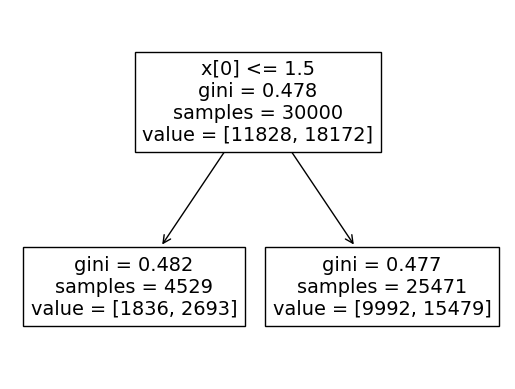

In [159]:
from sklearn.tree import plot_tree

plot_tree(best_model)

Podemos inspeccionar las clases:


In [160]:
best_model.classes_

array(['a', 'b'], dtype='<U1')

Podemos realizar una predicción con el mejor modelo encontrado:


In [161]:
best_model.predict([[1, 1, 2]])

array(['b'], dtype='<U1')

### Búsqueda Aleatoria

- [Randomized Parameter Optimization](https://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-optimization)


In [162]:
from sklearn.linear_model import SGDClassifier

In [163]:
model = SGDClassifier(random_state=0)

In [164]:
from scipy.stats import loguniform

param_dist = {
    'loss': [
        'hinge',        # SVM
        'log_loss',          # logistic regression
        # 'preceptron',  # perceptron (not supported)
    ],
    'alpha': loguniform(1e-4, 1e2),  # de 0.0001 a 100.0
}

Al parámetro alpha lo va a obtener desde muestras de una función de probabilidad tipo loguniform:


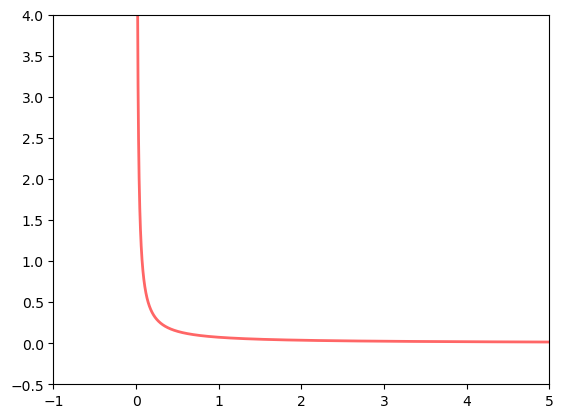

In [165]:
import matplotlib.pyplot as plt
a = 1e-4
b = 100
fig, ax = plt.subplots(1, 1)
x = np.linspace(a, b, 100000)
plt.xlim(-1, 5)
plt.ylim(-0.50, 4)
ax.plot(x, loguniform.pdf(x, a, b), 'r-', lw=2,
        alpha=0.6, label='loguniform pdf')

Podemos muestrear mano con [ParameterSampler](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterSampler.html):


In [166]:
from sklearn.model_selection import ParameterSampler

for params in ParameterSampler(param_dist, 10, random_state=0):
    print(params)
    model = SGDClassifier(**params, random_state=0)
    # model.fit(...)
    # model.predict(...)

{'alpha': 0.19628224813442816, 'loss': 'log_loss'}
{'alpha': 11.630395714480311, 'loss': 'log_loss'}
{'alpha': 0.1859084363016964, 'loss': 'log_loss'}
{'alpha': 0.5512926225087429, 'loss': 'hinge'}
{'alpha': 0.042220489831498315, 'loss': 'hinge'}
{'alpha': 0.00021891618132748294, 'loss': 'hinge'}
{'alpha': 0.019982467392329464, 'loss': 'hinge'}
{'alpha': 7.46470024356059, 'loss': 'hinge'}
{'alpha': 0.2560161525002872, 'loss': 'log_loss'}
{'alpha': 10.386580256500284, 'loss': 'hinge'}


### Búsqueda Aleatoria + Validación Cruzada


También podemos dejar que Sklearn se encargue de todo con [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html):


In [167]:
from sklearn.model_selection import RandomizedSearchCV

model = SGDClassifier(random_state=0)

cv = RandomizedSearchCV(model, param_dist, n_iter=10, cv=3, random_state=0)
cv.fit(X, y)

RandomizedSearchCV(cv=3, estimator=SGDClassifier(random_state=0),
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002900F9D9B10>,
                                        'loss': ['hinge', 'log_loss']},
                   random_state=0)

In [168]:
import pandas as pd
results = cv.cv_results_
df = pd.DataFrame(results)
df[['param_loss', 'param_alpha', 'mean_test_score',
    'std_test_score', 'rank_test_score']]

,param_loss,param_alpha,mean_test_score,std_test_score,rank_test_score
0,log_loss,0.196282,0.605733,0.000047,2
1,log_loss,11.630396,0.603567,0.003017,10
2,log_loss,0.185908,0.605733,0.000047,2
3,hinge,0.551293,0.605733,0.000047,2
4,hinge,0.04222,0.605733,0.000047,2
5,hinge,0.000219,0.605733,0.000047,2
6,hinge,0.019982,0.605733,0.000047,2
7,hinge,7.4647,0.605767,0.000094,1
8,log_loss,0.256016,0.605733,0.000047,2
9,hinge,10.38658,0.605100,0.000849,9


In [169]:
cv.best_estimator_

SGDClassifier(alpha=7.46470024356059, random_state=0)

In [170]:
cv.best_params_

{'alpha': 7.46470024356059, 'loss': 'hinge'}

## Referencias

Scikit-learn:

- [Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)
